In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

from sklearn.model_selection import train_test_split 

## Loading CSV (Ground Truth)

In [8]:
RAW_DATA_PATH = "dataset/rawdata.csv"
df = pd.read_csv(RAW_DATA_PATH)

In [6]:
df.head()

,Ground Truth,GCV,ED GCV,AWS,ED AWS,Azure,ED Azure,MP,ED MP
0,"num = int(input(""Enter a number: ""))\nAns = 1\...","int (input (""Enter a number: "")\nnum =\nAns =)...",29,"num = int input C ""Enter a number: 11)\nAns = ...",23,"num = int (input (""Enter a number: ""\nAns =1\n...",16,"num = int (input (""Enter a number: "")\n\[\n\te...",45
1,from karel.stanfordkarel import *\n# This prog...,from Karel. stanfordkarel import *\n#This\npro...,257,from Karel. stanfor dkarel import *\n# This pr...,195,from Karel. stanfordkarel import *\n# This pro...,177,from Karel.stanfordkarel import * \#This progr...,306
2,def main():\n # input\n my_word = input(...,"def main ()\n#imput\nmy _ word = imput(""Entlo-...",210,"def main () :\n# imput\nmy wond = inpuTC ""Ente...",150,def main ( ) :\nLimput\nmy _ word = input( Ent...,149,defmaim ():\n\&imput\n\( m y \)-wond = impuT (...,298
3,"input_number = int(input(""Enter number""))\nval...","impur-number =\nint(impur (""Enter number'))\nv...",80,impur-number =\ninr(inpur ('Enter number')\nva...,59,"inpur_number =\nint(impur (""Enter number""\nVal...",50,\( \begin{array}{l}\text { inpur-number = } \\...,273
4,"def main():\n num = input(""input: "")\n s...","def main ():\nnum = input (""imput :"")\nsum\n=\...",49,"def main () :\nnum = input (""Input: "")\nsum = ...",33,"def main () :\nnum = input (""Input : "")\nsum =...",34,def \( \operatorname{main}(C) \) :\n\[\n\begin...,132


## Load and Preprocess Images

In [59]:
IMAGE_PATH = "dataset/images/"

In [60]:
preprocessed_images = []
ground_truths = []

In [61]:
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (320, 128))
    img = img / 255.0 
    img = np.expand_dims(img, axis = -1) # add channel dimention for model input
    return img

In [62]:
for i, row in df.iterrows():
    img_path = IMAGE_PATH + f"{i}.jpg"
    preprocessed_images.append(preprocess_image(img_path))
    ground_truths.append(row["Ground Truth"])

In [63]:
preprocessed_images = np.array(preprocessed_images)

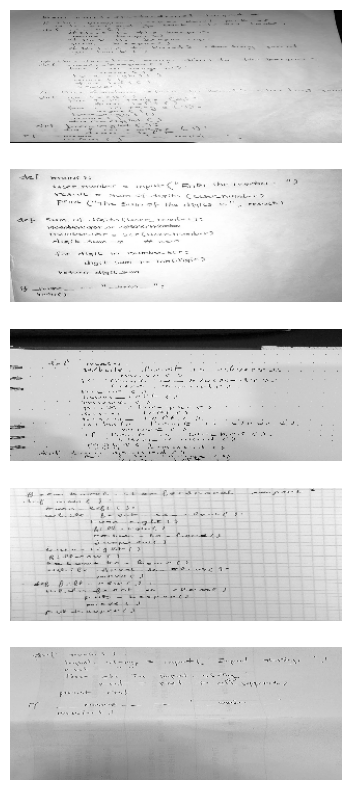

In [81]:
indices = np.random.choice(len(preprocessed_images), 5, replace = False)

plt.figure(figsize = (5, 10))
for i, idx in enumerate(indices):
    plt.subplot(5, 1, i + 1)
    plt.imshow(preprocessed_images[idx], cmap='gray') 
    plt.axis("off")
plt.show()

In [66]:
print(len(preprocessed_images))

55


In [67]:
print(preprocessed_images.shape)

(55, 128, 320, 1)


## Split Data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_images, 
    ground_truths, 
    test_size=0.2, 
    random_state=42
)

In [69]:
print(len(X_train))

44


In [70]:
print(len(X_test))

11


## Augment Training Data

In [121]:
augment_pipeline = A.Compose([
    #A.Affine(scale=(0.9, 1.1), shear=(-10, 10)),  
    #A.ElasticTransform(alpha=1, sigma=50),
    #A.GaussNoise(std_range=(0.1, 0.2), mean_range=(0, 0), p=0.5),  
    #A.MotionBlur(blur_limit=(3, 5), p=0.3),  
    #A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    #A.Normalize(mean=[0.5], std=[0.5]),  
    ToTensorV2()
])

In [122]:
NUM_AUG_COPIES = 3

In [123]:
def augment_images(X_train, y_train, augment_factor):
    augmented_X = []
    augmented_y = []
    
    for img, label in zip(X_train, y_train):
        img = np.array(img, dtype = np.uint8) 
        
        for _ in range(augment_factor): 
            augmented = augment_pipeline(image=img)["image"]
            augmented_X.append(augmented)
            augmented_y.append(label) 
    
    return np.array(augmented_X), np.array(augmented_y)

In [124]:
augmented_X_train, augmented_y_train = augment_images(X_train, y_train, NUM_AUG_COPIES)

In [125]:
print(len(X_train))

44


In [126]:
print(len(augmented_X_train))

132


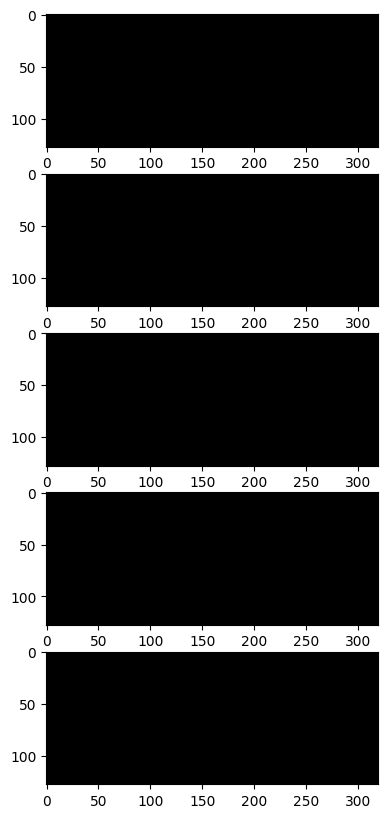

In [130]:
indices = np.random.choice(len(augmented_X_train), 5, replace = False)

plt.figure(figsize = (5, 10))
for i, idx in enumerate(indices):
    plt.subplot(5, 1, i + 1)
    plt.imshow(augmented_X_train[idx].squeeze(), cmap='gray') 
plt.show()